<a href="https://colab.research.google.com/github/httpmarin2s/data-science-projects/blob/main/Classificador_genero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learn Python for Data-Science**

- O projeto abaixo é uma versão realizada sobre uma série de videos realizadas pelo canal Siraj Raval.

- Nesse caso, vamos construir um classificador de gênero (feminino/masculino) de modo que o modelo de ML seja possível classificar uma persona com base nas suas features em seu gênero de origem.

- youtube video: (https://youtu.be/T5pRlIbr6gg?si=FK3fOr4En3J5E95j)

## **Preparação do ambiente**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle



## **Criando os vetores**

In [6]:
num_amostras = 500

# loc = media | scale = desvio padrao

# variável peso
peso_mulher = np.random.normal(loc=60, scale=5, size=num_amostras)
peso_homem = np.random.normal(loc=70, scale=5, size=num_amostras)

# variável altura
altura_mulher = np.random.normal(loc=160, scale=5, size=num_amostras)
alutra_homem = np.random.normal(loc=170, scale=5, size=num_amostras)

# variável numero do sapato
sapato_mulher = np.random.normal(loc=36, scale=2, size=num_amostras)
sapato_homem = np.random.normal(loc=40, scale=2, size=num_amostras)

##**Mesclando os dados**

In [17]:
X_mulheres = np.column_stack((altura_mulher, peso_mulher, sapato_mulher))
X_homens = np.column_stack((alutra_homem, peso_homem, sapato_homem))

y_mulheres = np.zeros(num_amostras) # mulheres
y_homens = np.ones(num_amostras)

In [18]:
X = np.vstack((X_mulheres, X_homens))
y = np.hstack((y_mulheres, y_homens))

In [19]:
df = np.column_stack((X, y))

In [20]:
df

array([[152.79557818,  59.81751644,  39.51035381,   0.        ],
       [158.06314417,  55.09266116,  35.02303638,   0.        ],
       [159.69812391,  60.54563914,  36.87080027,   0.        ],
       ...,
       [170.90591525,  75.09654136,  41.49958179,   1.        ],
       [175.16732711,  75.28589515,  38.82476208,   1.        ],
       [170.97171284,  72.70102829,  44.19731065,   1.        ]])

In [21]:
df = shuffle(df, random_state=42)

## **Criando um dataframe**

In [23]:
df = pd.DataFrame(df, columns=['Altura', 'Peso', 'Tamanho do Sapato','Gênero'])

In [24]:
df.head()

,Altura,Peso,Tamanho do Sapato,Gênero
0,167.100630,69.585599,38.697079,1.0
1,172.615628,72.352013,38.266063,1.0
2,181.017893,62.869386,39.932596,1.0
3,179.351550,64.601733,41.975485,1.0
4,152.976903,57.949682,34.810928,0.0


## **Tratando os dados**

In [30]:
df['Tamanho do Sapato'] = df['Tamanho do Sapato'].astype(int)
df['Gênero'] = df['Gênero'].astype(int)
df['Altura'] = df['Altura'].round(2)
df['Peso'] = df['Peso'].round(2)

# 0 PARA MULHER E 1 PARA HOMEM

In [31]:
df.head()

,Altura,Peso,Tamanho do Sapato,Gênero
0,167.10,69.59,38,1
1,172.62,72.35,38,1
2,181.02,62.87,39,1
3,179.35,64.60,41,1
4,152.98,57.95,34,0


## **Separando X e Y**

In [32]:
X_modelo = df.drop('Gênero', axis=1)
y_modelo = df['Gênero']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_modelo,
    y_modelo,
    test_size=0.3,
    random_state=42
)

##**Criando o Modelo**

In [34]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_previsao = modelo.predict(X_test)

##**Avaliando o Modelo**

In [37]:
report = classification_report(y_test, y_previsao)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       156
           1       0.94      0.93      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [41]:
cm = confusion_matrix(y_test, y_previsao)
print(cm)

[[148   8]
 [ 10 134]]


In [44]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=modelo.classes_)

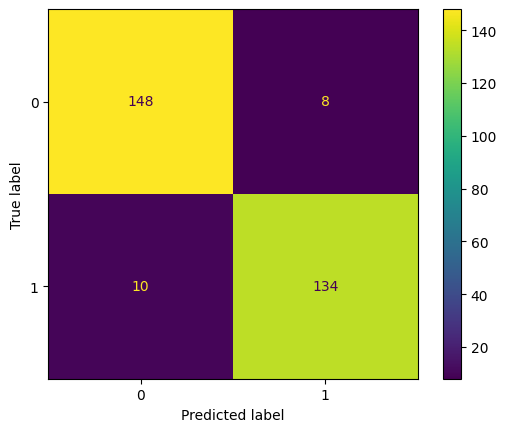

In [45]:
disp.plot()

##**Visualizar a árvore de decisão**

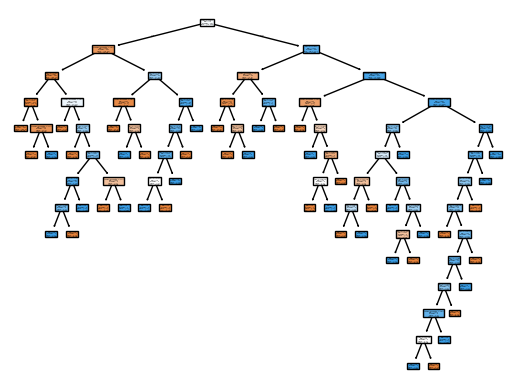

In [67]:
plot_tree(modelo,
          feature_names=['Altura', 'Peso', 'Tamanho do Sapato'],
          class_names=['Mulher', 'Homem'],
          filled = True)
plt.show()

## **Novos Dados**

In [73]:
nome = input("Digite o seu nome: ")
altura = float(input("Digite a sua altura: "))
peso = float(input("Digite o seu peso: "))
sapato = int(input("Digite o tamanho do seu sapato: "))


Digite o seu nome: Marianna
Digite a sua altura: 160
Digite o seu peso: 60
Digite o tamanho do seu sapato: 36


In [74]:
vetor = np.array([altura, peso, sapato]).reshape(1, -1)

In [75]:
previsao = modelo.predict(vetor)
print(previsao)
print("0 = Mulher; 1 = Homem")

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
